In [1]:
from PatriciaDatabase import PatriciaDatabase
from PatriciaTrie import PatriciaTrie
from PatriciaDatabaseTest import test

In [17]:
import hashlib
import random

Arguments to connectiong database

In [3]:
args = {
    'DB_NAME': "blockchain_postgresql", 
    #'DB_USER': "darkhannurlybay",
    #'DB_PASSWORD': "",
    #'DB_HOST': "localhost",
    'DB_PORT': "5432",
    'verbose': False
}

Run unit tests

In [4]:
test(args)


Seems like good!


Creating some users in our system

In [5]:
users = {}
#user = {    'Alice': '000010',    'Bob': '010100',    'Sally': '111111'}

In [6]:
number_of_users = 2

In [7]:
for i in range(number_of_users):
    users['user_'+str(i)] = hashlib.sha224(bytes(i)).hexdigest()

In [8]:
#Displaying users' list
for i in users.items():
    print(i)

('user_0', 'd14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f')
('user_1', 'fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073')


['node_id', 'parent_id', 'balance', 'hash', 'type']
(2, 1, 1000000, '0ff6b679250d6ec83205ce0e7a1c7649a1f00ca1d48b58448161e3d28d6d8d3c', 'leaf')
(1, 0, 1000000, 'be85b58863b0b34d36bd259b9fb47c5b5a92332e46f28d6735cda66af7352f6d', 'user')
(4, 3, 1000000, 'acc76ef273a5d7ed28b8f4d3cbbc8bf8496ac7d598cd395207912015315161f4', 'leaf')
(3, 0, 1000000, '7e9385b98bbc67c58b16b30514089c088dc9ec372788ece583d870fbcfbc65e8', 'user')
(0, None, 0, '93c9c687d023c7f32d1f75f57074518db744251e3ebd8ae07faa2937c28c884a', 'root')


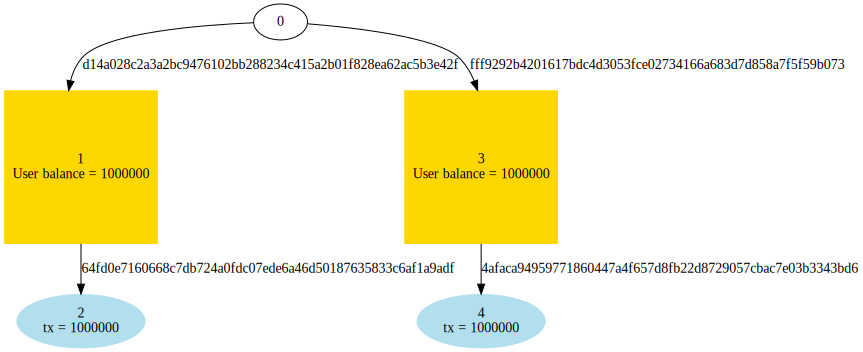

In [31]:
db = PatriciaDatabase(**args)
db.delete_tables()
db.create_tables()

t = PatriciaTrie(db, simple_hash=False)

#creating users with initial balances i.e. 10 ** 6
amount = 10 ** 6
for i in users.items():
    
    tx_hash = hashlib.sha224(str(i[1] + str(amount)).encode('utf-8')).hexdigest()
    t.create(i[1],amount,tx_hash)

#t.create(user['Alice'], 100, '0000')
#t.create(user['Bob'], 50, '0001')

db.print_column_name('PatriciaNode');
for row in t.db.show_table('PatriciaNode'):
    print(row)
    
t.draw()

In [32]:
#assert t.get_balance(user['Alice']) == 100
#assert t.get_balance(user['Bob']) == 50

In [33]:
#t.spend(user['Alice'], user['Bob'], 10, '1000')
#assert t.get_balance(user['Alice']) == 90
#assert t.get_balance(user['Bob']) == 60
#t.draw()

In [34]:
#creating random transactions
transactions = 5
for i in range(transactions):
        sender = random.choice(list(users.values()))
        receiver = random.choice(list(i for i in users.values() if i not in sender))
        print(sender,' -> ',receiver)
        amount = random.randint(0, 100)
        transaction_string = str(sender + receiver + str(amount))
        tx_hash_balance = hashlib.sha224(transaction_string.encode('utf-8')).hexdigest()
        #t.spend(users[sender], users[receiver],amount , tx_hash_balance)
        t.spend(sender, receiver,amount , tx_hash_balance)
        
#t.draw()
transaction_string


d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073
d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073
fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073  ->  d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f
fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073  ->  d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f
d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073


'd14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42ffff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b07398'

In [35]:
db.close_session()

In [ ]:
db = PatriciaDatabase(**args)
t = PatriciaTrie(db, simple_hash=False)

In [ ]:
t.create(user['Sally'], 0, '1111')
t.spend(user['Alice'], user['Sally'], 40, '1001')
assert t.get_balance(user['Alice']) == 50
assert t.get_balance(user['Sally']) == 40
t.draw()

In [ ]:
t.spend(user['Bob'], user['Sally'], 50, '1002')
t.get_balance(user['Bob'])
assert t.get_balance(user['Bob']) == 10
assert t.get_balance(user['Sally']) == 90
t.draw()

In [10]:
db.close_session()